# All Julia Codes in One file

### General Note on saving and uploading Colab files
Save file downloaded from the GitHub on your computer. Go to [Colab](https://colab.research.google.com/) and log-in with your Google account. Upload this file to Colab. Usually, Colab opens a pop-up to open notebooks. Choose the upload option and upload the file. Otherwise, to upload: File > Upload Notebook. Once the file open on Colab, follow the instructions given in the file. This uploaded file will get saved in the Colab Notebooks folder of your Google Drive.

## Instructions on using this Jupyter Notebook with Julia code on Colab
1. This note book has codes written in Julia. You can execute the codes in a cell by clicking the "Run" button beside the cell or by clicking on the cell and press Ctrl+Enter.

2. Colab does not support Julia by default. So we have to install Julia and relevant packages first. That is done in the first cell.

3. Execute the cell (click on it and press Ctrl+Enter) to install Julia, IJulia and other packages. This takes a couple of minutes (even 10 to 15 minutes).

4. Reload this page (press Ctrl+R, or ⌘+R, or the F5 key) and continue to the next section where we check the instalation.

5. The code in the "checking the instalation" section may throw error. In that case: Go to Runtime > Change runtime type > Select Julia from the pull down menu of Runtime type. Now, once you are ready with Julia, check the instalation by running the `versioninfo()` command again.  If there is no error, proceed for the subsequent code blocks.

_Notes_:
* If your Colab Runtime gets reset (e.g., due to inactivity), repeat steps 3 to 5.


#First step: Install Julia and its packages

In [ ]:
# For Instalations

%%shell
set -e

#---------------------------------------------------#
JULIA_VERSION="1.11.1" # any version ≥ 0.7.0
JULIA_PACKAGES="IJulia Random Plots Statistics Distributions"
JULIA_NUM_THREADS=2
#---------------------------------------------------#

if [ -z `which julia` ]; then
  # Install Julia
  JULIA_VER=`cut -d '.' -f -2 <<< "$JULIA_VERSION"`
  echo "Installing Julia $JULIA_VERSION on the current Colab Runtime..."
  BASE_URL="https://julialang-s3.julialang.org/bin/linux/x64"
  URL="$BASE_URL/$JULIA_VER/julia-$JULIA_VERSION-linux-x86_64.tar.gz"
  wget -nv $URL -O /tmp/julia.tar.gz # -nv means "not verbose"
  tar -x -f /tmp/julia.tar.gz -C /usr/local --strip-components 1
  rm /tmp/julia.tar.gz

  # Install Packages
  for PKG in `echo $JULIA_PACKAGES`; do
    echo "Installing Julia package $PKG..."
    julia -e 'using Pkg; pkg"add '$PKG'; precompile;"' &> /dev/null
  done

  # Install kernel and rename it to "julia"
  echo "Installing IJulia kernel..."
  julia -e 'using IJulia; IJulia.installkernel("julia", env=Dict(
      "JULIA_NUM_THREADS"=>"'"$JULIA_NUM_THREADS"'"))'
  KERNEL_DIR=`julia -e "using IJulia; print(IJulia.kerneldir())"`
  KERNEL_NAME=`ls -d "$KERNEL_DIR"/julia*`
  mv -f $KERNEL_NAME "$KERNEL_DIR"/julia

  echo ''
  echo "Successfully installed `julia -v`!"
  echo "Please reload this page (press Ctrl+R, ⌘+R, or the F5 key) then"
  echo "jump to the 'Checking the Installation' section."
fi

Installing Julia 1.11.1 on the current Colab Runtime...
2024-12-07 06:46:39 URL:https://julialang-s3.julialang.org/bin/linux/x64/1.11/julia-1.11.1-linux-x86_64.tar.gz [254553793/254553793] -> "/tmp/julia.tar.gz" [1]
Installing Julia package IJulia...
Installing Julia package Random...
Installing Julia package Plots...
Installing Julia package Statistics...
Installing Julia package Distributions...
Installing IJulia kernel...
[ Info: Installing julia kernelspec in /root/.local/share/jupyter/kernels/julia-1.11

Please reload this page (press Ctrl+R, ⌘+R, or the F5 key) then
jump to the 'Checking the Installation' section.


# Checking the Installation
The `versioninfo()` function should print your Julia version and some other info about the system:

In [1]:
versioninfo()

Julia Version 1.11.1
Commit 8f5b7ca12ad (2024-10-16 10:53 UTC)
Build Info:
  Official https://julialang.org/ release
Platform Info:
  OS: Linux (x86_64-linux-gnu)
  CPU: 2 × Intel(R) Xeon(R) CPU @ 2.20GHz
  WORD_SIZE: 64
  LLVM: libLLVM-16.0.6 (ORCJIT, broadwell)
Threads: 2 default, 0 interactive, 1 GC (on 2 virtual cores)
Environment:
  LD_LIBRARY_PATH = /usr/local/nvidia/lib:/usr/local/nvidia/lib64
  JULIA_NUM_THREADS = 2


# Simulate coin toss

In [ ]:
using Random

SyntaxError: invalid syntax (<ipython-input-1-9c751d939744>, line 1)

In [ ]:
# Number of coin toss
N = 10

# Probability of head
p = 0.7


0.7

In [ ]:
# count of Heads in N coin tosses
H_count = 0

# The sequence of Head and Tail
toss_result = String[]

# Generate uniformly distributed random numbers
U = rand(N)

# loop over N coin tosses
for j in 1:N

    # decide H or T
    if U[j] <= p
        # It is a Head
        H_count = H_count + 1
        push!(toss_result, "H")
    else
        push!(toss_result, "T")
    end
end

println("The result of ", N, " coin tosses: ", join(toss_result, " "))
println("Number of Heads: ", H_count)


The result of 10 coin tosses: H T H T T H H H H T
Number of Heads: 6


## -------------------------------------------------------------------

# Simulate transcription as coin toss

Rate of transcription, lambda = 2

Total time, T = 10

Therefore, the average number of mRNA produced in time T,

mu = lambda*T = 20

Let's divide the total time in 1000 time steps. So, number of time steps, N = 1000.

Following binomial distribution, mu = p* N, here p is the probability of production of one mRNA at a particular interval

So, p = mu/N = 20/1000 = 0.02

In [ ]:
# Inputs for simulation

# Number of time steps
time_steps = 1000

# Probability of head
p = 0.02

# Initial number of mRNA
m0 = 0

# Number of repeats of the experiment
N = 1000

1000

In [ ]:
# Get required packages
using Random
using Plots
using Statistics

In [ ]:
# This function simulate transcrition as seriese of coin tosses
# Inputs:
# time_steps: Number of discrete time points
# p: probability of having a mRNA at a time point
# Output: A vector that stores cumulative number of mRNA at each time step

function transcription_toss(time_steps, p, m0)

    # Do T coin tosses with probability p
    # Store the cumulative count
    num_mRNA_cumulative = cumsum(rand(time_steps) .<= p)

    # Prepend the initial count m0
    return [m0; num_mRNA_cumulative .+ m0]
end

transcription_toss (generic function with 1 method)

In [ ]:
# perform one simulation
mRNA_count = transcription_toss(time_steps,p, m0)

# Print result
println("Number of mRNA produced = ", mRNA_count[end])

Number of mRNA produced = 17


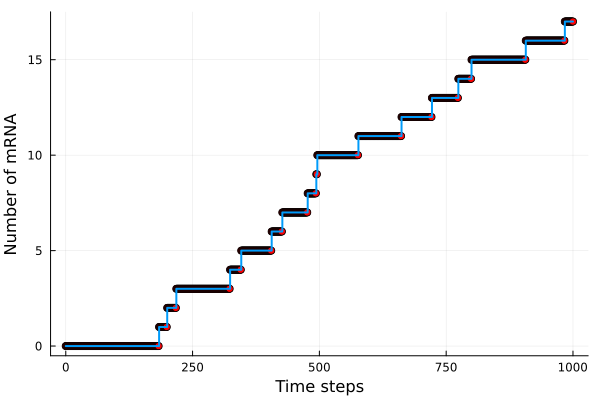

In [ ]:
# Plot the data
plot(0:time_steps, mRNA_count,
    xlabel="Time steps", ylabel="Number of mRNA",
    scatter=:auto, marker=:circle, markercolor=:red,
    lw=2, line=:steppost,
    legend=:none)

In [ ]:
# Perform multiple repeats of the simulation

# Data holder
data = zeros(time_steps + 1, N)

# Do simulations
for j in 1:N
    data[:,j] = transcription_toss(time_steps,p, m0)
end

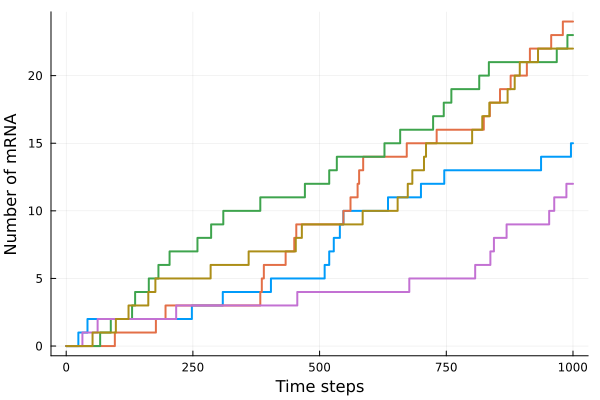

In [ ]:
# Plot result few independent runs

plot(0:time_steps, data[:, 1:5],
    xlabel="Time steps", ylabel="Number of mRNA",
    lw=2, line=:steppost,
    legend=:none)

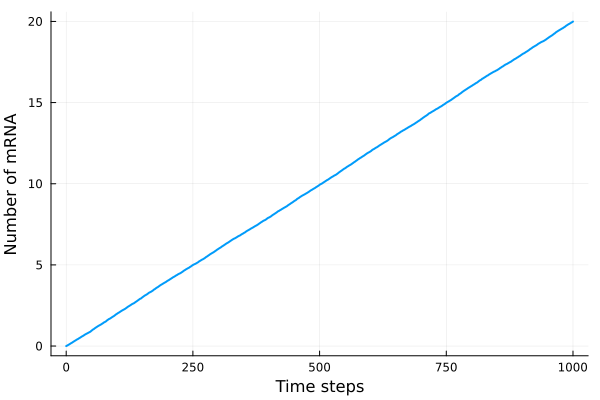

In [ ]:
# Plot the average of multiple simulations

# Get the row average of the data matrix
avg_data = mean(data, dims = 2)

# Plot the average data
plot(0:time_steps, avg_data,
    xlabel="Time steps", ylabel="Number of mRNA",
    lw=2,
    legend=:none)

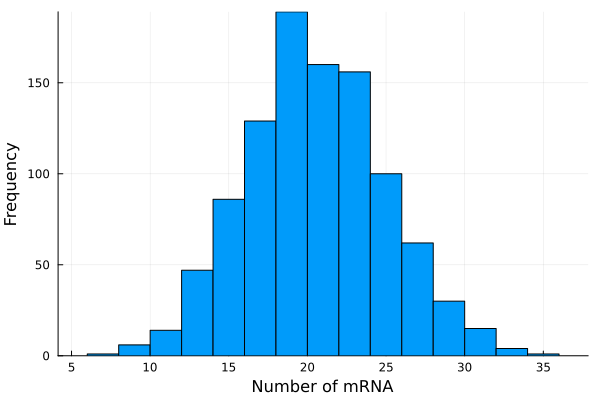

In [ ]:
# Plot histogram to show distribution of mRNA in cells at the end

# Extract the last row
final_mRNA = data[end, :]

# Plot the histogram
histogram(final_mRNA, bins=20,  xlabel="Number of mRNA", ylabel="Frequency", legend=:none)

## -----------------------------------------------------------------------

# Simulate transcription as a Poisson process

Rate of transcription, lambda = 2

Total time, T = 10



In [ ]:
# Inputs for simulations

# Rate of transcription
lambda = 2.0

# Total time
T = 10.0

# Initial number of mRNA
mRNA_0 = 0

# Total number of independent simulations
N = 1000

1000

In [ ]:
# Call the packages
using Distributions
using Plots

In [ ]:
# Function to simulate a Poisson process

# Inputs:
# lambda: Rate of the process. Float64
# T: Total time for simulation. Float64
# x0: Initial count. Int

# Outputs:
# event_times: A vector listing time points of events
# event_counts: A vector listing cumulative count of events for each time point in event_times

function simulate_poisson(lambda::Float64, T::Float64, x0::Int)
    event_times = [0.0]   # To store the time of each event
    event_counts = [x0]      # To store the cumulative event count
    current_time = 0.0
    count = x0

    while current_time < T
        # Generate inter-arrival time from an exponential distribution
        inter_event_time = rand(Exponential(1 / lambda))

        # Update clock
        current_time += inter_event_time

        # Check if current_time is still within the desired time limit
        if current_time <= T
            count += 1                     # Increment the count of events
            push!(event_times, current_time)  # Record the time of the event
            push!(event_counts, count)      # Record the cumulative count
        end
    end

    return event_times, event_counts
end

simulate_poisson (generic function with 1 method)

In [ ]:
# Do one simulation
t, mRNA_count = simulate_poisson(lambda, T, mRNA_0);


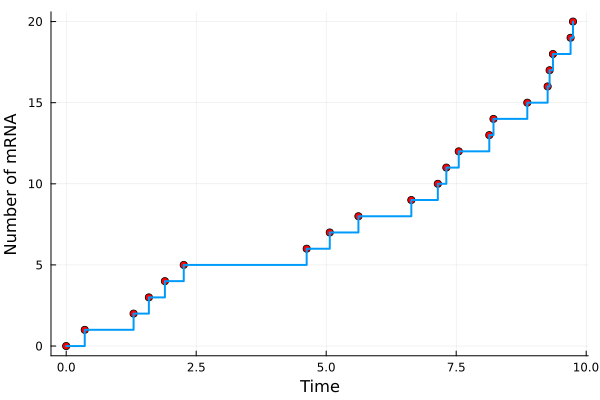

In [ ]:
#Plot the data
plot(t, mRNA_count,
    xlabel="Time", ylabel="Number of mRNA",
    scatter=:auto, marker=:circle, markercolor=:red,
    lw=2, line=:steppost,
    legend=:none)


In [ ]:
# Function to bin simulation data

# Inputs:
# time_data: A vector with event times. Float64
# count_data: A vector listing cumlative counts at time points in time_data. Int
# init_count: Initial count. Int
# total_T: Total time of simulation. Float64
# dt: Small interval for binning the data. Float64

#Outputs:
# time_bins: A vector with total time divided at small equal intervals. Float64
# binned_data: Vector for binned data as per the time_bins. Int

function data_binning(time_data::Vector{Float64}, count_data::Vector{Int}, init_count::Int, total_T::Float64, dt::Float64)
    time_bins = 0.0:dt:total_T
    binned_data = zeros(length(time_bins))
    binned_data[1] = init_count

    for j in 2:length(time_bins)
        idx = findlast(x -> x <= time_bins[j], time_data)
        binned_data[j] = count_data[idx]
    end

    return time_bins, binned_data
end


data_binning (generic function with 1 method)

In [ ]:
# Doing multiple simulations

# Small time interval used for binning of data
dt = 0.1

# Creat time bins, vector to store average data
time_bins = 0.0:dt:T
avg_data = zeros(Float64, length(time_bins))
all_binned_data = zeros(Float64, length(time_bins), N)

# Do the independent simulations one-by-one
for j in 1:N

    # Simulate
    t, mRNA_count = simulate_poisson(lambda, T, mRNA_0)

    # Bin the data
    time_bins, binned_data = data_binning(t, mRNA_count, mRNA_0, T, dt)

    # collected binned data
    all_binned_data[:,j] = binned_data

end

# Average the data
avg_data = sum(all_binned_data, dims=2) ./ N;



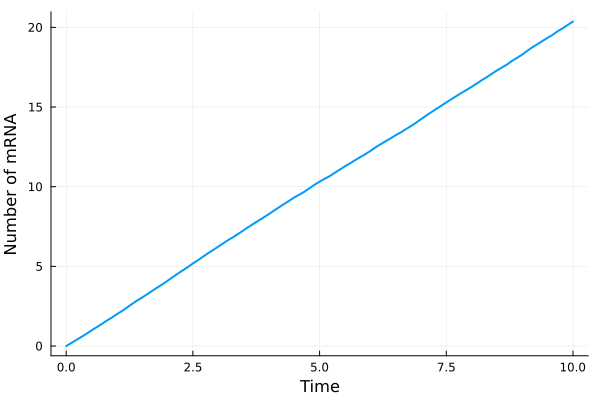

In [ ]:

#Plot the average data
plot(time_bins, avg_data,
    xlabel="Time", ylabel="Number of mRNA",
    lw=2,
    legend=:none)


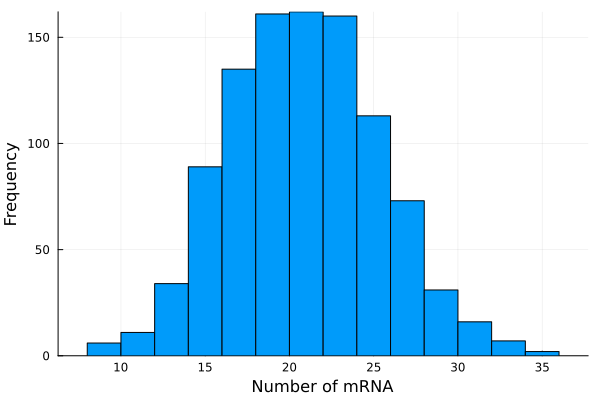

In [ ]:
# Plot histogram to show distribution of mRNA in cells at the end

# Extract the last row
final_mRNA = all_binned_data[end, :]

# Plot the histogram
histogram(final_mRNA, bins=20,  xlabel="Number of mRNA", ylabel="Frequency", legend=:none)


# Simulate transcription using the Gillespie algorithm

In [2]:
# This is the Julia version of the R code of the Gillspie method provided in the
# repository. The R and Julia codes for Gillespie algorithms are contributed by
# Shaon and Anton

# Demonstration of the Gillespie algorithm for a simple production-degradation
# model of transcription.

# Production rate (per second)
k2 = 1.0

# Degradation rate (per molecule per second)
k1 = 0.1

# Initial number of molecules of species A, at T=0
At = 0

# Stored trajectory of At values
At_traj = []

# Initial time
T = 0.0

# Stored trajectories of times of reactions
T_traj = []

# Number of iterations to run
iter = 20000


20000

In [3]:
# Load required packages
using Random
using Plots
using Statistics
using Distributions

In [4]:
# Do the simulation

for i in 1:iter
    # Find out waiting time to the next reaction
    r1 = rand()  # Generate the first uniformly distributed random number
    ktotal = At * k1 + k2 # Total current rate, which depends on the number of A molecules
    T_wait = (1 / ktotal) * log(1 / r1) # T_wait is an exponentially distributed random number with rate ktotal
    T = T + T_wait # Time when the next reaction will occur

    # Find out which reaction will occur
    r2 = rand()  # Generate the second uniformly distributed random number
    if r2 < k2 / ktotal
        At = At + 1 # Production
    else
        At = At - 1 # Degradation
    end

    # Store the current value of A and time of reaction
    push!(At_traj, At)
    push!(T_traj, T)
end



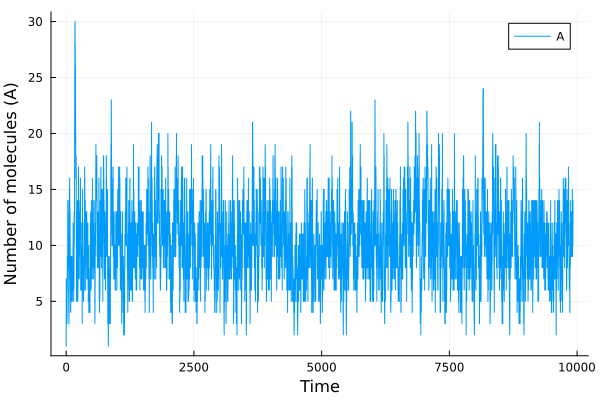

In [5]:
# Plot the A versus time trajectory.

plot(T_traj, At_traj, xlabel="Time", ylabel="Number of molecules (A)", label="A")


Mean of A in long term: 10.750592074101363
Variance of A in long term: 10.294055570482417


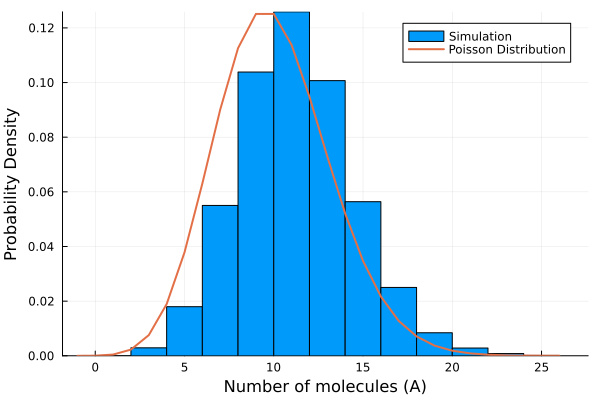

In [6]:
# Long time limit of the distribution of A (trajectories should be longer than 10000 steps)

At_long = At_traj[1000:iter]
mean_At_long = mean(At_long)
var_At_long = var(At_long)

println("Mean of A in long term: ", mean_At_long)
println("Variance of A in long term: ", var_At_long)

#b_range = range(minimum(At_long) - 1, maximum(At_long) + 1, length=26)
# Create histogram of long time data and match with Poisson distribution
histogram(At_long, bins=20, normalize=:pdf, xlabel="Number of molecules (A)", ylabel="Probability Density", label="Simulation")


x_values = range(start = minimum(At_long)-2, stop = maximum(At_long)+2, step = 1)
y_values = pdf.(Poisson(k2 / k1), x_values)  # Using Poisson distribution'
plot!(x_values, y_values, lw=2, label="Poisson Distribution")